In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import RocCurveDisplay 
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.preprocessing import StandardScaler 

In [12]:
# Dane do obliczeń 
df = pd.read_csv("faults.csv", header=0) 
df.head() 
# df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
# Sprawdzenie czy są brakujące dane 

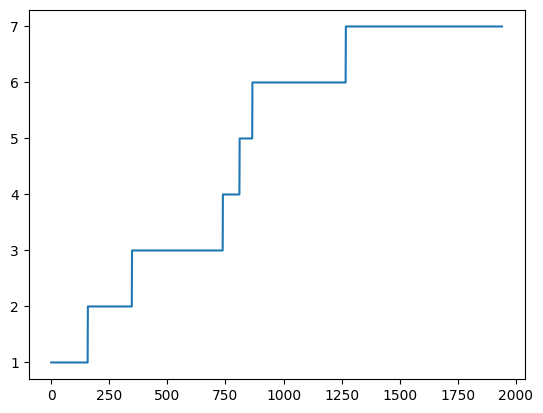

In [28]:
# Dane do klasyfikacji 
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps','Other_Faults'] 
X = df.drop(target_cols, axis=1) 
y = df[target_cols].values.argmax(axis=1)+1
plt.plot(y)
plt.show()

In [25]:
 # Liczebność klas 
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7]), array([158, 190, 391,  72,  55, 402, 673]))

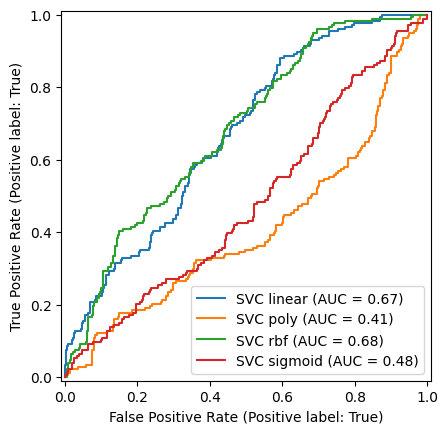

In [29]:
# Porównanie klasyfikatorów 
y = y == 7  # klasyfikacja binarna: czy klasa 'Dirtiness' (5) czy inna
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  
fig, ax = plt.subplots() 
svc1 = LinearSVC() # klasyfikator 
svc1.fit(X_train, y_train) # trening 
RocCurveDisplay.from_estimator(svc1, X_test, y_test, ax=ax, name='SVC linear') # ROC/AUC 
svc2 = SVC(kernel='poly', degree=3)
svc2.fit(X_train, y_train) 
RocCurveDisplay.from_estimator(svc2, X_test, y_test, ax=ax, name='SVC poly')
svc3 = SVC(kernel='rbf') 
svc3.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc3, X_test, y_test, ax=ax, name='SVC rbf')
svc4 = SVC(kernel='sigmoid') 
svc4.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc4, X_test, y_test, ax=ax, name='SVC sigmoid')
plt.show() 